<a href="https://colab.research.google.com/github/bela975/IDHMBrazilianCities/blob/main/IDHMIsabela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atividade extra:

IDHM dos Municípios Brasileiros

Cenário:

Um gestor público solicitou a uma consultoria um levantamento de diversas informações sobre os municípios brasileiros. O objetivo é estudar características e propor *políticas adequadas nas áreas de Educação, Saúde e aumento de Renda.* Para auxiliar nesse estudo, utilize a base de dados `cidades_do_brasil.xlsx`  e responda às seguintes perguntas:

Panorama Geral:

O primeiro indicador a ser analisado é o Índice de Desenvolvimento Humano Municipal (IDHM), que é composto por três dimensões: longevidade, educação e renda. O índice varia de 0 a 1, sendo que quanto mais próximo de 1, maior o desenvolvimento humano.

Questões:

a) Quartil Inferior:
- Qual o valor que separa os 25% dos municípios com os menores IDHM? Utilize o conceito de quartis.

b) Concentração Geográfica:
- Considerando os municípios com menor IDHM, existe uma concentração em algum estado ou distrito? Utilize o conceito de Pareto para fundamentar sua resposta.

c) Classificação ONU:
- A ONU classifica o IDH em quatro faixas:
  - Baixo: < 0,550
  - Médio: 0,550 - 0,699
  - Alto: 0,700 - 0,799
  - Muito Alto: >= 0,800
  - Pergunta: Com base nessa classificação, analise a situação atual do Brasil e de cada região.

Educação Infantil:

d) Boxplot por Região:
- Construa um boxplot da variável IDHM_Educacao por região (NO, NE, SE, S e CO). Comente as semelhanças e diferenças entre os gráficos.

e) Municípios com Mais Crianças:  
- Na região com a menor média de IDHM_Educacao, identifique os municípios que estão acima do 3º quartil nacional em relação à quantidade de crianças com idade entre 1 e 4 anos (variável IBGE_1-4).

f) Empresas de Educação:
- Identifique os municípios que estão no 1º quartil nacional em relação à quantidade de empresas do setor educacional (variável COMP_P). Dessa forma, vamos priorizar municípios com poucas empresas de educação.

g) Prioridade de Investimento:
- Considerando as análises anteriores, proponha uma ordem de priorização para investimento na educação dessa região.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
from google.colab import drive
from google.colab import files
uploaded = files.upload()

Saving ISABELA SPINELLI FERRARI DE SIQUEIRA CAMPOS ARRUDA - cidades_do_brasil.xlsx to ISABELA SPINELLI FERRARI DE SIQUEIRA CAMPOS ARRUDA - cidades_do_brasil.xlsx


In [5]:
df = pd.read_excel(r'ISABELA SPINELLI FERRARI DE SIQUEIRA CAMPOS ARRUDA - cidades_do_brasil.xlsx', skiprows=3)
df.head(12)

,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Valor Vazio
0,Mojuí Dos Campos,PA,NaN,NaN,NaN,NaN,8831.56,41.0,1
1,Paraíso Das Águas,MS,NaN,NaN,NaN,NaN,92163.92,3.0,1
2,Balneário Rincão,SC,NaN,NaN,NaN,NaN,17788.63,3.0,1
3,Pescaria Brava,SC,NaN,NaN,NaN,NaN,8341.33,14.0,1
4,Santa Terezinha,BA,126.0,NaN,NaN,NaN,6796.16,12.0,1
5,Pinto Bandeira,RS,NaN,NaN,NaN,NaN,18184.45,1.0,1
6,Lagoa Dos Patos,RS,NaN,NaN,NaN,NaN,NaN,NaN,1
7,Santa Teresinha,BA,NaN,0.590,0.549,0.459,NaN,NaN,1
8,São Caetano,PE,NaN,NaN,NaN,NaN,NaN,NaN,1
9,São Paulo,SP,514794.0,0.805,0.843,0.725,57071.43,16030.0,0


In [6]:
df.describe(include='all')

,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Valor Vazio
count,5576,5576,5568.000000,5568.000000,5568.000000,5568.000000,5573.000000,5573.000000,5576.000000
unique,5299,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,São Domingos,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1544.858657,0.659223,0.642918,0.559136,21129.767244,30.973802,0.001614
std,NaN,NaN,9250.689121,0.071970,0.080668,0.093351,20327.836119,260.937133,0.040147
min,NaN,NaN,5.000000,0.418000,0.400000,0.207000,3190.570000,0.000000,0.000000
25%,NaN,NaN,158.000000,0.599000,0.572000,0.490000,9061.720000,2.000000,0.000000
50%,NaN,NaN,376.500000,0.665000,0.654000,0.560000,15879.960000,6.000000,0.000000
75%,NaN,NaN,952.000000,0.718000,0.707000,0.631000,26156.990000,17.000000,0.000000


QUESTAO A: CALCULANDO O VALOR DOS MUNICÍPIOS DENTRO DOS 25% COM IDHM MENOR

In [9]:
q1 = df['IDHM'].quantile(0.25)

df.columns = df.columns.str.strip()
# Exibindo o valor que separa os 25% menores IDHM
print(f"O valor que separa os 25% dos municípios com os menores IDHM é: {q1}")

O valor que separa os 25% dos municípios com os menores IDHM é: 0.599


QUESTÃO B: ORDENAND POR IDHM E CONCEITO DE PARETO

In [10]:
# Ordenar os municípios pelo IDHM (do menor para o maior)
df_sorted = df.sort_values(by='IDHM')

# Verificar o número total de municípios
total_municipios = len(df_sorted)

# Definir os 20% dos municípios com os menores IDHM
quantidade_20_municipios = int(0.20 * total_municipios)

# Selecionar esses 20% dos municípios
menores_idhm = df_sorted.head(quantidade_20_municipios)

# Agrupar por estado e contar o número de municípios por estado nesses 20% de menor IDHM
concentracao_estados = menores_idhm['Estado'].value_counts()

# Exibir a concentração de municípios por estado
print(concentracao_estados)

# Calcular o número de estados que representam 20% do total de estados
total_estados = len(df['Estado'].unique())
quantidade_20_estados = int(0.20 * total_estados)

# Verificar os estados com a maior concentração de municípios de menor IDHM
estados_mais_concentrados = concentracao_estados.head(quantidade_20_estados)

# Exibir os resultados
print(f"Os estados que concentram a maior parte dos municípios com os menores IDHM são:\n{estados_mais_concentrados}")

# Comparar o número de municípios nestes estados com o total dos 20% dos municípios
porcentagem_concentracao = (estados_mais_concentrados.sum() / quantidade_20_municipios) * 100

print(f"Esses estados concentram {porcentagem_concentracao:.2f}% dos municípios com os menores IDHM.")

Estado
BA    207
PI    164
MA    140
PB    120
PE     81
PA     80
AL     80
MG     49
RN     46
AM     45
SE     32
CE     28
TO     17
AC     12
RR      4
MS      3
PR      3
MT      1
AP      1
RO      1
GO      1
Name: count, dtype: int64
Os estados que concentram a maior parte dos municípios com os menores IDHM são:
Estado
BA    207
PI    164
MA    140
PB    120
PE     81
Name: count, dtype: int64
Esses estados concentram 63.86% dos municípios com os menores IDHM.


Ou seja, a distribuição de IDHM não chega a estar em conformidade com o princípio de pareto, porém Há sim uma concentração relevante de IDHM alto em poucos estados.

QUESTÃO C: CLASSIFICÇÃO ONU IDH E ANALISE DE REGIOES DO BRASIL

ADICIONANDO COLUNA DE CLASSIFICAÇÃO NAS CATEGORIAS BAIXO, MEDIO, ALTO E MUITO ALTO

In [11]:
def classificar_idhm(idhm):
    if idhm < 0.550:
        return 'Baixo'
    elif 0.550 <= idhm <= 0.699:
        return 'Médio'
    elif 0.700 <= idhm <= 0.799:
        return 'Alto'
    else:
        return 'Muito Alto'

# Aplicar a função de classificação ao DataFrame
df['Classificacao_ONU'] = df['IDHM'].apply(classificar_idhm)

# Exibir as primeiras linhas do DataFrame para verificar
print(df.head())


           Município Estado  IBGE_1-4  IDHM  IDHM_Renda  IDHM_Educacao  \
0   Mojuí Dos Campos     PA       NaN   NaN         NaN            NaN   
1  Paraíso Das Águas     MS       NaN   NaN         NaN            NaN   
2   Balneário Rincão     SC       NaN   NaN         NaN            NaN   
3     Pescaria Brava     SC       NaN   NaN         NaN            NaN   
4    Santa Terezinha     BA     126.0   NaN         NaN            NaN   

   GDP_CAPITA  COMP_P  Valor Vazio Classificacao_ONU  
0     8831.56    41.0            1        Muito Alto  
1    92163.92     3.0            1        Muito Alto  
2    17788.63     3.0            1        Muito Alto  
3     8341.33    14.0            1        Muito Alto  
4     6796.16    12.0            1        Muito Alto  


AGRUPANDO POR REGIÕES/ESTADOS E CALCULANDO DISTRIBUIÇÕES

In [16]:
distribuicao_por_estado = df.groupby(['Estado', 'Classificacao_ONU']).size().unstack(fill_value=0)

# Exibir a distribuição por estado
print(distribuicao_por_estado)

#Criando colunas de região através de um dicionário

# Dicionário de mapeamento dos estados para suas respectivas regiões
mapa_regioes = {
    'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte', 'BA': 'Nordeste', 'CE': 'Nordeste',
    'DF': 'Centro-Oeste', 'ES': 'Sudeste', 'GO': 'Centro-Oeste', 'MA': 'Nordeste', 'MT': 'Centro-Oeste',
    'MS': 'Centro-Oeste', 'MG': 'Sudeste', 'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste',
    'PI': 'Nordeste', 'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte',
    'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'
}

# Adicionar uma nova coluna "Região" com base no mapeamento dos estados
df['Regiao'] = df['Estado'].map(mapa_regioes)

# Agrupar por região e contar a quantidade de municípios em cada faixa de IDH
distribuicao_por_regiao = df.groupby(['Regiao', 'Classificacao_ONU']).size().unstack(fill_value=0)

# Exibir a distribuição por região
print(distribuicao_por_regiao)


#* Calcular a distribuição geral de IDH no Brasil*
distribuicao_brasil = df['Classificacao_ONU'].value_counts()
print(f"Distribuição do IDH no Brasil:\n{distribuicao_brasil}")


Classificacao_ONU  Alto  Baixo  Muito Alto  Médio
Estado                                           
AC                    1      6           0     15
AL                    1     35           0     66
AM                    1     21           0     40
AP                    2      0           0     14
BA                    9     43           1    365
CE                    4      1           0    179
DF                    0      0           1      0
ES                   29      0           2     47
GO                  124      0           0    122
MA                    4     55           0    158
MG                  238      9           2    604
MS                   30      1           1     47
MT                   51      1           0     89
PA                    3     38           1    102
PB                    5     22           0    196
PE                    6     22           1    157
PI                    2     57           0    165
PR                  243      1           2    154


MOSTRANDO ANÁLISE DE IDH ONU EM GRÁFICO DE BARRAS EPILHADAS RELACIONANDO QTD MUNICIPIOS, REGIÃO E CLASSIFICAÇÃO ONU

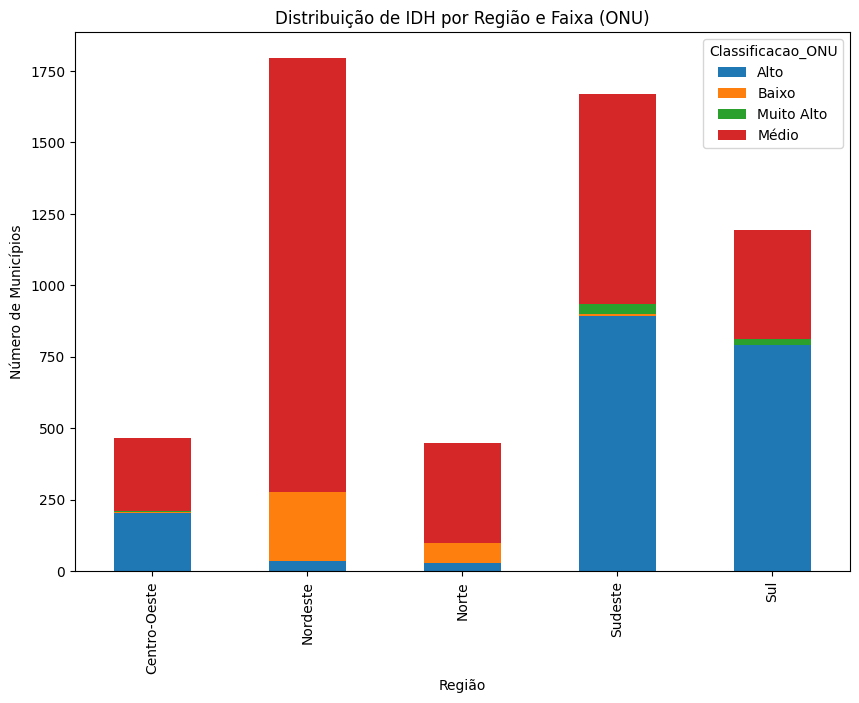

In [17]:
distribuicao_por_regiao.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Distribuição de IDH por Região e Faixa (ONU)')
plt.xlabel('Região')
plt.ylabel('Número de Municípios')
plt.show()

**EDUCAÇÃO INFANTIL**

QUESTÃO D: BOXPLOT POR REGIAO DO IDHM_EDUCAÇÃO

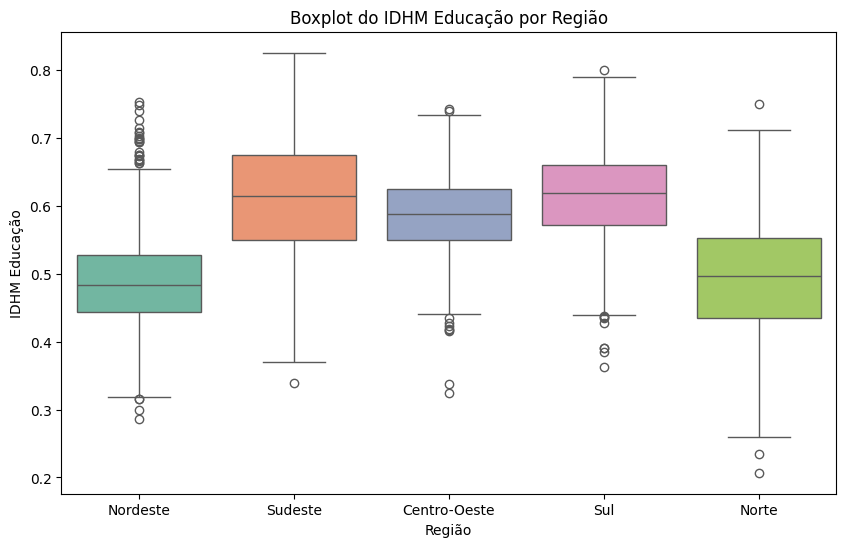

In [20]:
#já criamos a coluna regiões anteriormente
# Filtrando os dados que tenham valores não nulos para o IDHM_Educacao
df_educacao = df[['Regiao', 'IDHM_Educacao']].dropna()

# Criando o boxplot usando seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Regiao', y='IDHM_Educacao',hue= 'Regiao', data=df_educacao, palette='Set2', dodge=False)


# Removendo a legenda para evitar duplicidade, pois o eixo x já é categórico
plt.legend([],[], frameon=False)

# Adicionando título e rótulos aos eixos
plt.title('Boxplot do IDHM Educação por Região')
plt.xlabel('Região')
plt.ylabel('IDHM Educação')

# Mostrando o gráfico
plt.show()

QUESTÃO E: Municípios com mais crianças na região com menor media de idhm_educação

In [22]:
# Calculando a média de IDHM_Educacao por região
media_educacao_regiao = df.groupby('Regiao')['IDHM_Educacao'].mean()

# Identificando a região com a menor média de IDHM_Educacao
regiao_menor_educacao = media_educacao_regiao.idxmin()

print(f"A região com a menor média de IDHM_Educacao é: {regiao_menor_educacao}, como observado no boxplot.")

A região com a menor média de IDHM_Educacao é: Nordeste, como observado no boxplot.


In [23]:
#Calculando o 3 quartil da variável IBGE_1-4
terceiro_quartil_ibge = df['IBGE_1-4'].quantile(0.75)

print(f"O 3º quartil nacional de IBGE_1-4 (crianças entre 1 e 4 anos) é: {terceiro_quartil_ibge}")

O 3º quartil nacional de IBGE_1-4 (crianças entre 1 e 4 anos) é: 952.0


In [25]:
#removendo os municípios do nordeste que estão acima do 3 quartil dessa variável
# Filtrar os municípios da região com a menor média de IDHM_Educacao
municipios_na_regiao = df[df['Regiao'] == regiao_menor_educacao]

# Filtrar os municípios que estão acima do 3º quartil de IBGE_1-4
municipios_com_mais_criancas = municipios_na_regiao[municipios_na_regiao['IBGE_1-4'] > terceiro_quartil_ibge]

# Exibir os municípios filtrados
print("Municípios da região com mais crianças (acima do 3º quartil):")
print(municipios_com_mais_criancas[['Município', 'IBGE_1-4', 'IDHM_Educacao']])


Municípios da região com mais crianças (acima do 3º quartil):
       Município  IBGE_1-4  IDHM_Educacao
16        Recife   54720.0          0.698
19      Salvador   91470.0          0.679
24     Fortaleza  129766.0          0.695
45     Barreiras    8402.0          0.668
58         Natal   41558.0          0.694
...          ...       ...            ...
3709   Araçoiaba    1158.0          0.498
3810   Pirapemas     970.0          0.514
5196   Tamandaré    1134.0          0.479
5215    Irauçuba    1092.0          0.557
5221  Turilândia     987.0          0.402

[456 rows x 3 columns]


QUESTÃO F: EMPRESAS DE EDUCAÇÃO
- Identifique os municípios que estão no 1º quartil nacional em relação à quantidade de empresas do setor educacional (variável COMP_P). Dessa forma, vamos priorizar municípios com poucas empresas de educação.

IDENIFICANDO MUNICÍPIOS NO 1 QUARTIL

In [26]:
# Calcular o 1º quartil (Q1) da variável COMP_P (empresas de educação)
primeiro_quartil_comp_p = df['COMP_P'].quantile(0.25)

print(f"O 1º quartil nacional de COMP_P (empresas de educação) é: {primeiro_quartil_comp_p}")


O 1º quartil nacional de COMP_P (empresas de educação) é: 2.0


FILTRANDO MUNICÍPIOS IGUAIS OU ABAIXO AO VALOR D 1 QUARTIL, OU SEJA, POUCAS EMPRESAS DE EDUCAÇÃO

In [29]:
# Filtrar os municípios que estão no 1º quartil (ou seja, aqueles com COMP_P <= Q1)
municipios_poucas_empresas = df[df['COMP_P'] <= primeiro_quartil_comp_p]

# Exibir os municípios filtrados
print("Municípios com poucas empresas de educação (1º quartil):")
print(municipios_poucas_empresas[['Município', 'COMP_P']])

Municípios com poucas empresas de educação (1º quartil):
              Município  COMP_P
5        Pinto Bandeira     1.0
640            Condeúba     0.0
654             Parambu     2.0
655   Cristais Paulista     2.0
686           Jaborandi     1.0
...                 ...     ...
5571  Floresta Do Piauí     1.0
5572          João Dias     1.0
5573         Araguainha     1.0
5574  Lagoinha Do Piauí     0.0
5575             Viçosa     1.0

[1783 rows x 2 columns]


g) Prioridade de Investimento:
- Considerando as análises anteriores, proponha uma ordem de priorização para investimento na educação dessa região.

LEVANDO EM CONSIDERAÇÃO OS PONTOS ANALISADOS, creio que os investimentos deveriam ser concentrados na região nordeste, que tem o menor IDHM_educação, mais especificamente nas cidades da região com menos empresas do setor educacional, como é o caso dos municípios da analise acima:
Condeúba
Parambu
Jaborandi (Bahia)
Floresta Do Piauí
João Dias
Lagoinha Do Piauí
Viçosa (Alagoas)
e depois de melhorá-las, sugiro uma reavaliação do IDHM no nordeste para ver se ele subiu. mas sugiro que sempre se trabalhe na reião de pior IDHM com o objetivo de uniformizar esse índice nas regiões brasileiras.